# MMN 12 Computer Vision

## Preparatory Setup

### Library Imports

In [184]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from scipy.stats import uniform, expon, randint
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.manifold import TSNE
import os
%matplotlib inline

### Plot Style Setup

In [2]:
# change rcParams so figure aesthetics match jupyterthemes style
# NOTE: or use plt.style.use(['dark_background']) to get dark plots without installing themes. 
from jupyterthemes import jtplot
jtplot.style()

## Iris Dataset

[link to Iris dataset source website](https://archive.ics.uci.edu/ml/datasets/iris)

### Overview

The dataset consists of 150 samples. Each sample is assigned to 1 of 3 possible classes, and holds a value for each of the 4 attributes.



_Note_: this is not the original dataset in neither shape, form, or format. We've done some pre-processing (outside notebook scope) for convenience.

#### Classes
- Iris Setosa 
- Iris Versicolour 
- Iris Virginica

#### Attributes
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm

### Dataset Exploration

In [10]:
# load dataset
iris_data = pd.read_csv('./iris_dataset.csv', index_col='id')

In [11]:
# number of samples
iris_data.species.count()

150

In [12]:
# showcase a few random samples
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
id,,,,,
104,6.5,3.0,5.8,2.2,virginica
74,6.4,2.9,4.3,1.3,versicolor
69,5.6,2.5,3.9,1.1,versicolor
30,4.8,3.1,1.6,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa


In [6]:
# unique classes
pd.unique(iris_data.species)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

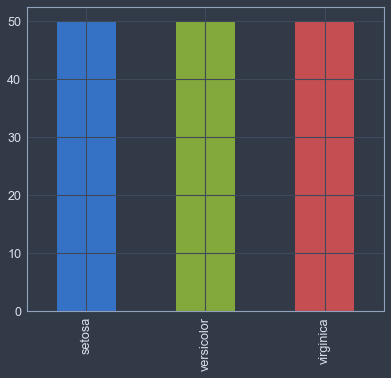

In [8]:
# number of samples in each class
iris_data.species.value_counts().plot.bar()

In [21]:
# x_name = 'sepal_width'; y_name = 'sepal_length'
# for species in pd.unique(iris_data.species):
#     x = iris_data[iris_data.species==species][x_name]
#     y = iris_data[iris_data.species==species][y_name]
#     plt.scatter(x,y, label=species)
# plt.xlabel(x_name); plt.ylabel(y_name); plt.legend()

Text(0,0.5,'')

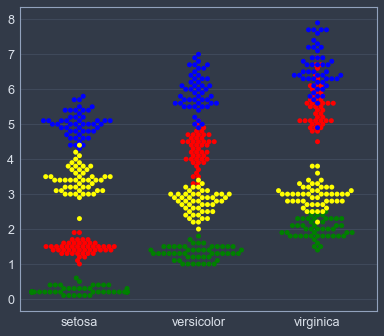

In [22]:
sns.swarmplot(x="species", y='petal_length', color='red', data=iris_data)
sns.swarmplot(x="species", y="petal_width", color='green', data=iris_data)
sns.swarmplot(x="species", y="sepal_length", color='blue', data=iris_data)
sns.swarmplot(x="species", y="sepal_width", color='yellow', data=iris_data)
plt.xlabel(''); plt.ylabel('')

Text(0,0.5,'')

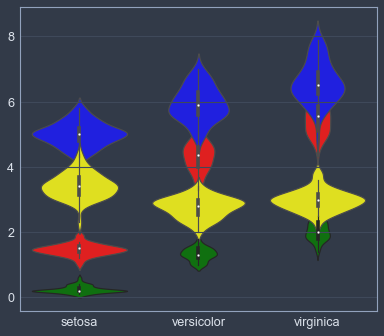

In [13]:
sns.violinplot(x="species", y='petal_length', color='red', data=iris_data)
sns.violinplot(x="species", y="petal_width", color='green', data=iris_data)
sns.violinplot(x="species", y="sepal_length", color='blue', data=iris_data)
sns.violinplot(x="species", y="sepal_width", color='yellow', data=iris_data)
plt.xlabel(''); plt.ylabel('')

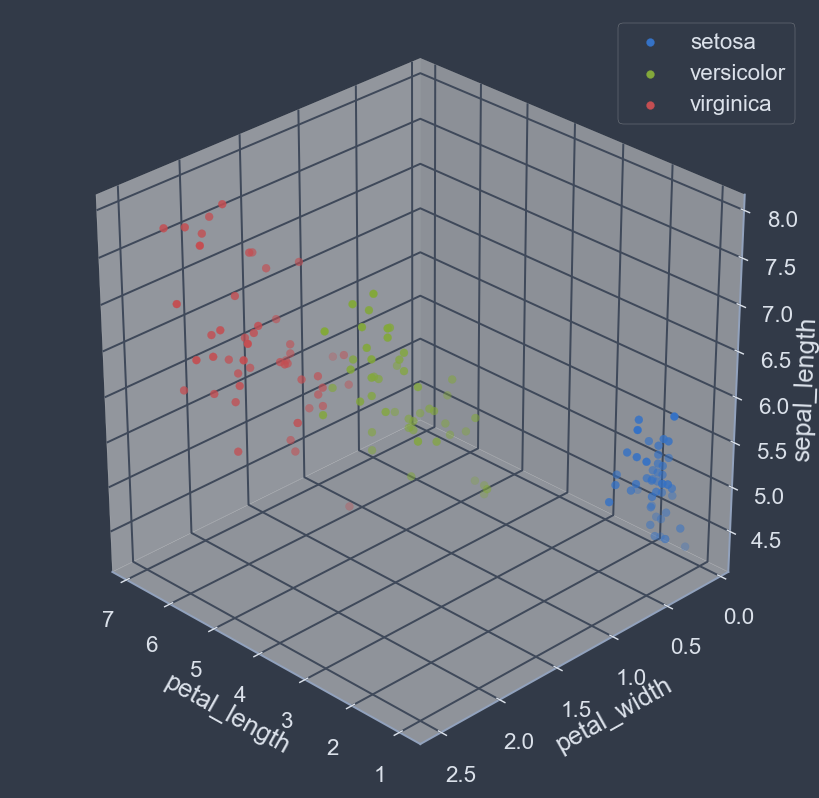

In [14]:
fig= plt.figure(figsize=(8,8), dpi=128); ax = fig.add_subplot(111, projection='3d')
x_name = 'petal_length'; y_name = 'petal_width'; z_name='sepal_length'
for species in pd.unique(iris_data.species):
    x = iris_data[iris_data.species==species][x_name]
    y = iris_data[iris_data.species==species][y_name]
    z = iris_data[iris_data.species==species][z_name]
    ax.scatter(x,y,z,label=species)
ax.view_init(30, 135)
ax.set_xlabel(x_name); ax.set_ylabel(y_name); ax.set_zlabel(z_name)
plt.legend()
plt.show()

#### Exploration Notes
- The class 'setosa' is linearly well separated.
- The classes 'versicolor' and 'virginica' are likely not linearly separable.
- Classes seem to have good boundaries overall.
- Data forms some well defined clusters. 
- Classes are mostly easily distinguishable by looking at cluster membership.

### Classifier Selection

Judging by our exploratory analysis, not all classes can be completely separated via a hyperplane. However, the classes do seem to have well defined boundaries and are generally easily distinguishable. Therefore, some form of non-linear classification approach will likely yield better results: commonly by space partitioning via curved hyper-surface class boundaries.


Both SVMs (non-linear, via a feature space transform) and k-NN can be suitable for the task. However, due to the shape of the data, using an SVM will require an extensive hyper-parameter search as well as kernel comparison against various metrics, with no clear foreseeable benefits. Meanwhile, the data distribution looks well suited for a kNN to be quickly and easily trained without much tunning or computation.


By way of the above rationale, we'll choose to utilize the kNN algorithm.

### Classifier Training

In [119]:
# separate data into features and labels
X = iris_data.drop(columns='species')
y = iris_data.species
print('features: ', X.shape); print('labels: ', y.shape)

features:  (150, 4)
labels:  (150,)


In [120]:
# training validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print('train split: ', X_train.shape, y_train.shape)
print('test split: ', X_test.shape, y_test.shape)

train split:  (135, 4) (135,)
test split:  (15, 4) (15,)


In [121]:
# randomization
X_train, y_train = shuffle(X_train, y_train)

In [122]:
# normalization
sc = StandardScaler()
sc.fit(X_train)
X_train_norm = sc.transform(X_train)
X_test_norm = sc.transform(X_test)

In [123]:
# choose k-nearest-neighbors param
k = int(round(np.sqrt(X_train.shape[0])))
k

12

In [124]:
# train classifier
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

### Classifier Validation

<mark>TODO: ROC, AUC, metrics, k values, visualize boundaries, SVM comparison, plot all 6 scatters, make 3d code more compact</mark>

In [125]:
# score classifier
print('Train Accuracy: {:.2f}'.format(knn.score(X_train_norm, y_train)))
print('Test Accuracy: {:.2f}'.format(knn.score(X_test_norm, y_test)))

Train Accuracy: 0.96
Test Accuracy: 1.00


## MNIST Dataset

[link to MNIST dataset source website](http://yann.lecun.com/exdb/mnist/)

### Overview

The dataset consists of 60,000 labeled samples. Each sample is a grayscale 28x28 pixel PNG image. Each image is labeled as a single digit from the range [0,9].


_Note_: this is not the original dataset in neither shape, form, format. We've done some pre-processing to it (outside scope of this notebook) for convenience. 

### Dataset Exploration

In [3]:
# MNIST image directory and imag file extension
IMG_DIR = './mnist-images/'; IMG_FILE_EXTENSION ='.png' 
# load file paths sorted by numerical value of file name, excluding the extension suffix
fpaths = sorted(os.listdir(IMG_DIR), key=lambda x: int(x[:-len(IMG_FILE_EXTENSION)]))
# load images 
X = np.array([cv2.imread(IMG_DIR+fp, cv2.IMREAD_GRAYSCALE) for fp in fpaths],dtype=np.uint8)
# load labels
y = np.loadtxt('mnist_labels.txt',dtype=np.uint8)

In [4]:
# count and shape
print('X: ', X.shape,'\ny: ', y.shape)

X:  (60000, 28, 28) 
y:  (60000,)


In [5]:
# unique classes
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

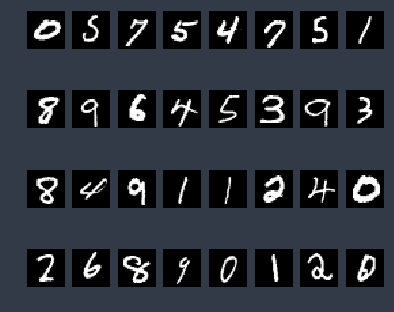

In [201]:
# showcase a few samples
for ax in plt.subplots(4,8)[1].ravel():
    rnd = np.random.randint(0,y.shape[0])
    ax.set_axis_off()
    ax.imshow(X[rnd],cmap='gray')

(array([ 5923.,  6742.,  5958.,  6131.,  5842.,  5421.,  5918.,  6265.,
         5851.,  5949.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

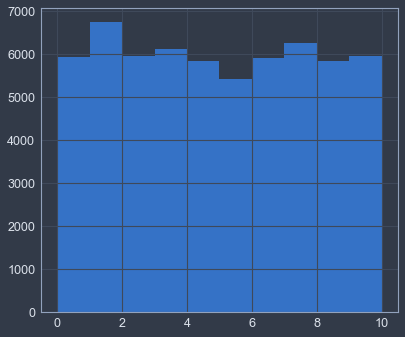

In [202]:
# plot class sample counts
plt.hist(y, bins=range(11))

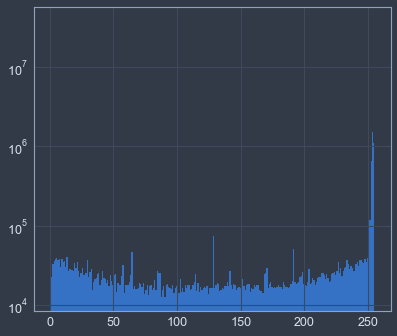

In [203]:
# plot logarithmic grayscale color histogram
hist = plt.hist(X.flatten(), bins=range(256), log=True)

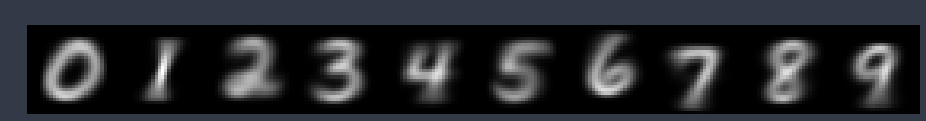

In [6]:
# compute and show average pixel values for each digit class
avgs = np.hstack([np.mean(X[y==i], axis=0) for i in range(10)])
plt.matshow(avgs,cmap='gray'); plt.axis('off');

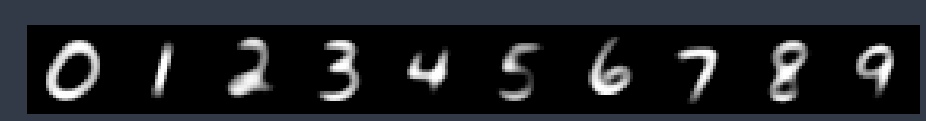

In [7]:
# compute and show median pixel values for each digit class
medians = np.hstack([np.median(X[y==i], axis=0) for i in range(10)])
plt.matshow(medians,cmap='gray'); plt.axis('off');

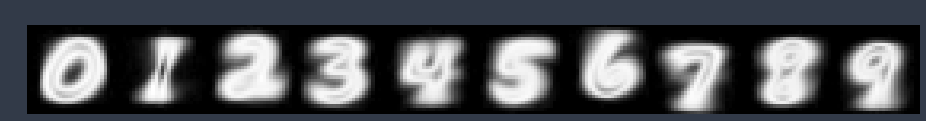

In [8]:
# compute and show standard diviation of pixel values for each digit class
stds = np.hstack([np.std(X[y==i], axis=0) for i in range(10)])
plt.matshow(stds,cmap='gray'); plt.axis('off');

### Preprocessing

In [256]:
# training validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('train split: ', X_train.shape, y_train.shape)
print('test split: ', X_test.shape, y_test.shape)

train split:  (42000, 28, 28) (42000,)
test split:  (18000, 28, 28) (18000,)


In [257]:
# randomization
X_train, y_train = shuffle(X_train, y_train)

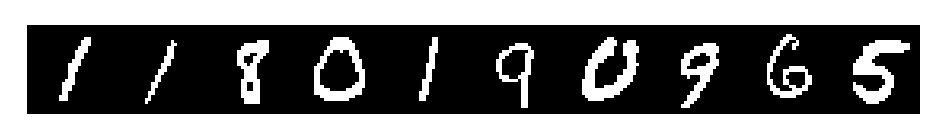

In [258]:
# threshold and binarize the images
X_train = np.where(X_train>127,1,0).astype(np.bool)
X_test = np.where(X_test>127,1,0).astype(np.bool)
plt.matshow(np.hstack(X_train[:10]*255),cmap='gray'); plt.axis('off');

In [259]:
# flatten images to match classifier,preprocessors,etc expected input shapes
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)
print('X_train:', X_train.shape,' X_test:', X_test.shape)

X_train: (42000, 784)  X_test: (18000, 784)


In [260]:
# standarize and perform PCA dimensionality reduction
pca = PCA(0.65, whiten=True)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print('X_train:', X_train.shape,' X_test:', X_test.shape)

X_train: (42000, 34)  X_test: (18000, 34)


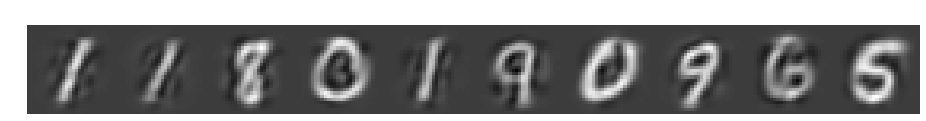

In [261]:
# plot inverse PCA result
plt.matshow(np.hstack(pca.inverse_transform(X_train[:10]).reshape(-1,28,28)),cmap='gray'); plt.axis('off');

In [262]:
# tsne = TSNE(n_components=2, n_iter=250)
# tsne.fit(X_train)

### Classifier Selection

MNIST is a larger dataset with many more dimensions and training samples (~5m even in binary form). Although it's still not large enough to make kNN classification computationaly unfeasible, it's probably a better direction to utilize something like a linear or polynomial SVM since it's likely to be a much more efficient classifier. 

### Classifier Training

In [271]:
# setup SVM hyperparam search
hyperparams = {'kernel':['linear', 'poly','rbf'],'C':expon(scale=10), 'gamma':expon(scale=0.1), 'degree':randint(3,7)}
rand_search = RandomizedSearchCV(SVC( ), hyperparams, n_jobs=-1)

In [272]:
%%capture
rand_search.fit(X_train,y_train)

### Classifier Validation

In [273]:
# rand_search.best_params_
# rand_search.best_estimator_
# rand_search.score(X_test, y_test)
y_pred = rand_search.predict(X_test)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1771
          1       0.99      0.99      0.99      1970
          2       0.97      0.97      0.97      1812
          3       0.96      0.97      0.97      1807
          4       0.96      0.98      0.97      1749
          5       0.97      0.96      0.96      1589
          6       0.98      0.99      0.98      1804
          7       0.97      0.97      0.97      1874
          8       0.97      0.96      0.97      1786
          9       0.97      0.96      0.97      1838

avg / total       0.97      0.97      0.97     18000

